Nathan Mohapatra

njmohapatra@ucdavis.edu

In [1]:
# Assignment-1 (HW1)

# Guidelines:

# We will be using Python for coding. Please install Jupyter notebook (available in Anaconda Navigator) as a recommended editor tool.
# The homework should be submitted electronically through Canvas before the submission deadline.
# Hard Submission Deadline: 11:30 PM
# Late Submission is 0 credit.
# Plagiarism is a clear violation of honor code!
# Shared/copied code from any source is not allowed, as it is considered plagiarism.
# _ 0 for the corresponding assignment in the 1st attempt.
# _ F for the course in the 2nd attempt!

# Your submission should be a zip file which contains the following:
# (a) a report in pdf format (use this label "report_HW1.pdf") that includes your answers to all questions, plots, figures and any instructions to run your code,
# (b) the python code files. 

# Please pay attention to the following points:
# (a) do not include the files which are already provided to you for the assignment such as datasets,
# (b) each function should be written with the appropriate comments and documentation in the code so it is understandable.
# Please describe what your code does, and how a functionality is implemented
# (c) do not use any toolbox unless it is explicitly allowed in the homework description.

# Assignment Description:
# For this assignment, download “Auto MPG” dataset (“auto-mpg.data” file; 398 cars, 9 features; remove the 6 records with missing
# values to end up with 392 samples) that is available in the UCIMachine Learning Repository:
# https://archive.ics.uci.edu/ml/datasets/Auto+MPG
# create a working directory for your assignment code, and save the dataset in a destination folder, called 'datasets'
# use the following sample code to import the dataset into pandas dataframe.
# From this point on, you need to code your solution from scratch. Unless explicitly stated,
# it is fine to use open source code, for example, sci-kit learn, to help you write your own implementation of the methods.

In [2]:
# read the saved dataset into pandas dataframe
import pandas as pd
df = pd.read_csv('./../datasets/auto-mpg.data', delim_whitespace=True, names=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name'])

In [3]:
# displaying the first 5 rows in df
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## Provide code and results in your submission addressing the following questions:

In [4]:
# libraries
import math
import numpy as np
import pandas as pd
import seaborn as sb

### 1: [10pt]

Allowed libraries: pandas (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html)

(a) Report the percentage of the missing data and write your own code to remove the observations with missing values '?'.

(b) Next, plot the distribution of the # make of a car (for instance 'ford' is a make of a car), by processing the information provided under the 'car_name' attribute. For instance, 'chevrolet chevelle malibu' is a 'chevrolet' and you can write code to create a bar plot and show the count of observations for each make of a car such as 'ford', 'volkswagen', etc.

In [5]:
# extract observations with missing values '?'
df[df['horsepower'] == '?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
32,25.0,4,98.0,?,2046.0,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875.0,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835.0,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905.0,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320.0,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035.0,20.5,82,1,amc concord dl


In [6]:
df.shape[0]

398

#### Report the percentage of missing data
The initial dataset has 398 rows (cars) and 9 columns (attributes). There are 6 rows with missing values; in each of these 6 rows, the missing value is denoted by a ‘?’ for the 'horsepower' feature. Thus, the percentage of missing data can be reported in two ways:

   1. Number of missing values / Total number of values
       
       $6/(398*9)=0.00167504187=0.17\%$
    
    
   2. Number of rows with missing values / Total number of rows
   
       $6/398=0.01507537688=1.51\%$

In [7]:
# remove observations with missing values '?'
df.drop(df[df['horsepower'] == '?'].index, inplace=True)
df.shape[0]

392

In [8]:
# create column with first word of name
df['car_make'] = df['car_name'].str.split().str[0]
df['car_make']

0      chevrolet
1          buick
2       plymouth
3            amc
4           ford
         ...    
393         ford
394           vw
395        dodge
396         ford
397        chevy
Name: car_make, Length: 392, dtype: object

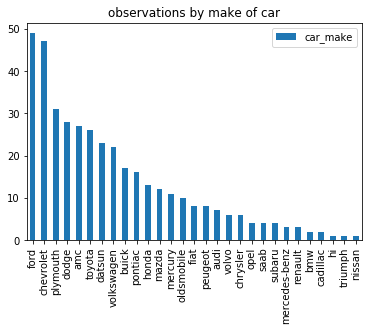

In [9]:
# correct names
df.replace('capri', 'ford', inplace = True)
df.replace('chevy', 'chevrolet', inplace = True)
df.replace('chevroelt', 'chevrolet', inplace = True)
df.replace('maxda', 'mazda', inplace = True)
df.replace('mercedes', 'mercedes-benz', inplace = True)
df.replace('toyouta', 'toyota', inplace = True)
df.replace('vw', 'volkswagen', inplace = True)
df.replace('vokswagen', 'volkswagen', inplace = True)

# plot distribution of # make of car
df['car_make'].value_counts().plot.bar(title='observations by make of car', legend='car_make')

### 2: [10pt]

Allowed libraries: pandas

(a) Lets assume that the goal is to classify the cars into 3 categories based on the weight attribute: light, medium, and heavy. Discover the threshold for each category, so that all samples are divided into three equally-sized bins.

(b) Next, plot a histogram to show the count of observations in each bin.

In [10]:
# maximum weight
max_weight = df['weight'].max()
max_weight

5140.0

In [11]:
# minimum weight
min_weight = df['weight'].min()
min_weight

1613.0

In [12]:
# width of bins
num_bins = 3
bin_width = (max_weight - min_weight) / num_bins
bin_width

1175.6666666666667

In [13]:
# threshold for 'light' classification
light_lower = int(min_weight)
light_upper = light_lower + math.floor(bin_width)
print(f'Light: [{light_lower}, {light_upper}]')

Light: [1613, 2788]


In [14]:
# threshold for 'medium' classification
medium_lower = light_upper + 1
medium_upper = medium_lower + math.floor(bin_width)
print(f'Medium: [{medium_lower}, {medium_upper}]')

Medium: [2789, 3964]


In [15]:
# threshold for 'heavy' classification
heavy_lower = medium_upper + 1
heavy_upper = int(max_weight)
print(f'Heavy: [{heavy_lower}, {heavy_upper}]')

Heavy: [3965, 5140]


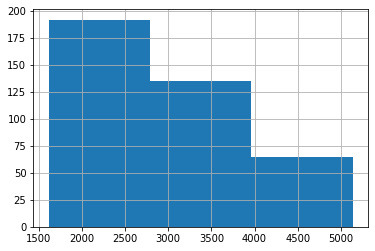

In [16]:
# histogram to show count of observations in each bin
df['weight'].hist(bins=3)

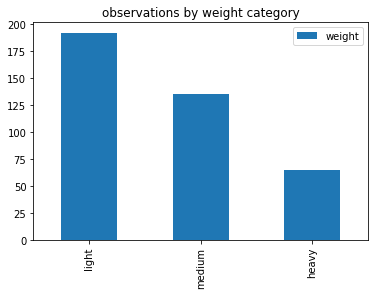

In [17]:
# alternative plot to show count of observations in each bin
out = pd.cut(df['weight'], 3, labels=['light', 'medium', 'heavy'])
out.value_counts().plot.bar(title='observations by weight category', legend='weight')

### 3: [10pt]

Allowed libraries: pandas, seaborn

(a) Create a 2D correlation matrix plot, similar to this example (https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07 and use seaborn library. You may use any published code to perform this.

(b) Describe the correlations between any two pairs of attributes in the dataset and why it does or does not match your expectation. (i.e., positive or negative correlation)


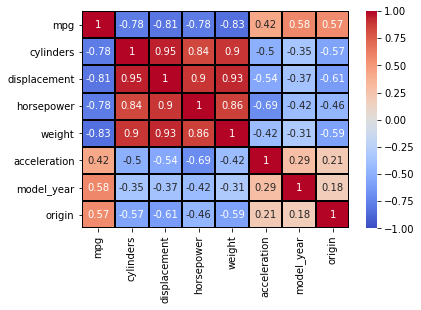

In [18]:
# create 2D correlation matrix plot
df['horsepower'] = df['horsepower'].astype(float)
sb.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap='coolwarm', linewidths=1, linecolor='black')

#### Describe the correlations between any two pairs of attributes in the dataset and why it does or does not match your expectation
There is a strong negative correlation (coefficient $r=-0.83$) between the $\ weight\ $  and  $\ mpg\ $  attributes in the dataset. This correlation matches my expectation because, intuitively, it makes sense that heavier cars consume fuel less efficiently and get less miles per gallon. Thus, as $\ weight\ $ increases, $\ mpg\ $ decreases.

### 4: [20pt]

Allowed libraries: pandas, numpy

(a) Write a linear regression solver that can accommodate polynomial basis functions on a single variable for prediction of weight. Your code should use the Ordinary Least Squares (OLS) estimator (i.e. the Maximum-likelihood estimator). Code this from scratch. Its recommended to use a library (e.g. numpy) for basic linear algebra operations (addition, multiplication and inverse).

In [19]:
class LinearRegressionSolver:
    def __init__(self):
        self.b = [] # weights
        
    def fit(self, x, y, order):
        X = np.ones(len(x)) # order = 0
        
        # accomodate polynomial basis functions (of any order >= 0) on single variable
        for i in range(order):
            X = np.c_[X, np.power(x, i + 1)]
        
        # Ordinary Least Squares (OLS) estimator
        self.b = np.linalg.inv(X.T@X)@(X.T@y)            

    def predict(self, x, order):
        N = len(x)
        
        # calculate y_hat values
        prediction = []
        for i in range(N):
            
            # accomodate polynomial basis functions (of any order >= 0) 
            y_hat = self.b[0]
            for j in range(order):
                y_hat += self.b[j + 1] * x[i] ** (j + 1)
            
            prediction.append(y_hat)
        
        return prediction
    
    def mse(self, y, prediction):
        N = len(y)
        
        # calculate Mean Squared Error (MSE)
        squared_error = 0
        for i in range(N):
            squared_error += (y[i] - prediction[i]) ** 2
        
        return squared_error / N

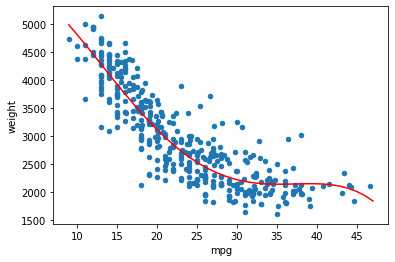

In [20]:
# set parameters 'x', 'y', and 'order'
# change parameters as desired
x = np.array(df['mpg']) 
y = np.array(df['weight'])
order = 4

# use LRS for prediction of weight
LRS = LinearRegressionSolver()
LRS.fit(x, y, order)
prediction = LRS.predict(x, order)
mse = LRS.mse(y, prediction)

# plot to visualize linear regression
ax = df.plot.scatter(x='mpg', y='weight')

fx = np.linspace(math.floor(x.min()), math.ceil(x.max()), math.ceil(x.max()) - math.floor(x.min()))
fy = LRS.b[0]
for i in range(order):
    fy += LRS.b[i + 1] * fx ** (i + 1)

ax.plot(fx, fy, 'r')